In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-dataset/symbols_valid_meta.csv
/kaggle/input/stock-market-dataset/stocks/MTL.csv
/kaggle/input/stock-market-dataset/stocks/JOE.csv
/kaggle/input/stock-market-dataset/stocks/DRE.csv
/kaggle/input/stock-market-dataset/stocks/CTY.csv
/kaggle/input/stock-market-dataset/stocks/AMSF.csv
/kaggle/input/stock-market-dataset/stocks/IMH.csv
/kaggle/input/stock-market-dataset/stocks/GFL.csv
/kaggle/input/stock-market-dataset/stocks/CLM.csv
/kaggle/input/stock-market-dataset/stocks/UBER.csv
/kaggle/input/stock-market-dataset/stocks/NEBU.csv
/kaggle/input/stock-market-dataset/stocks/SGB.csv
/kaggle/input/stock-market-dataset/stocks/WWW.csv
/kaggle/input/stock-market-dataset/stocks/UTSI.csv
/kaggle/input/stock-market-dataset/stocks/PBB.csv
/kaggle/input/stock-market-dataset/stocks/UFCS.csv
/kaggle/input/stock-market-dataset/stocks/ZM.csv
/kaggle/input/stock-market-dataset/stocks/DCPH.csv
/kaggle/input/stock-market-dataset/stocks/HALL.csv
/kaggle/input/stock-market-dataset/s

In [2]:
#importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [17]:
# to save plots as png output
sns.set(style="whitegrid")
os.makedirs("/kaggle/working/outputs", exist_ok=True)

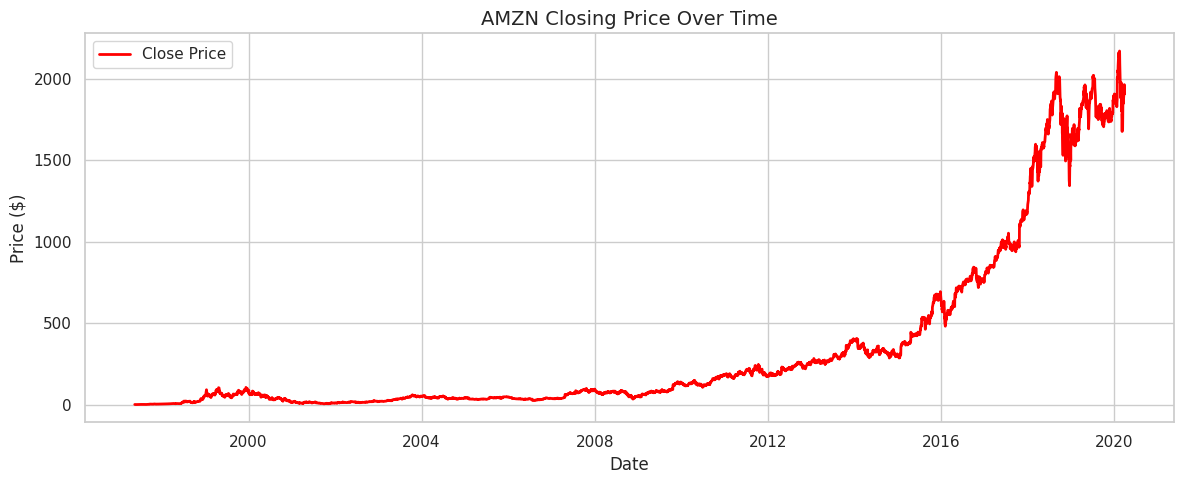

In [25]:
#importing Amazon Stock Prices and creating a DatFrame

df = pd.read_csv("/kaggle/input/stock-market-dataset/stocks/AMZN.csv")
df = df[['Date', 'Close']].copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.dropna(inplace=True)

# plotting Closing Price Over Time 
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close Price', color='red', linewidth=2)
plt.title("AMZN Closing Price Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("/kaggle/working/outputs/AMZN_Close_Price.png", dpi=300)
plt.show()

In [28]:
#Adding SMA20 and SMA50 for comparison

df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()
df.dropna(inplace=True)

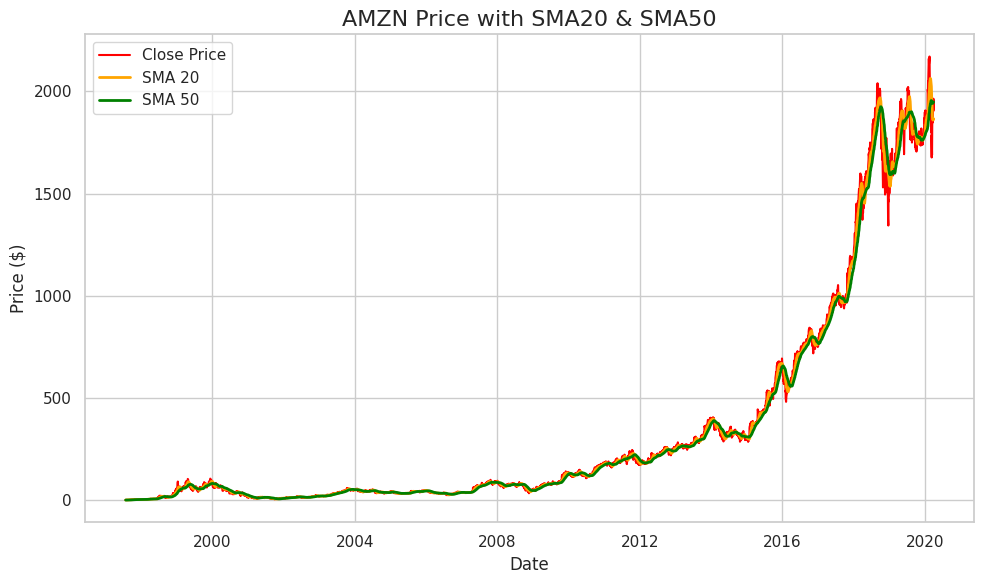

In [29]:
# Plotting SMAs

plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price',color='red', alpha= 1)
plt.plot(df['Date'], df['SMA20'], label='SMA 20', color='orange', linewidth=2)
plt.plot(df['Date'], df['SMA50'], label='SMA 50', color='green', linewidth=2)
plt.title("AMZN Price with SMA20 & SMA50", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("/kaggle/working/outputs/AMZN_Price_With_SMAs.png", dpi=300)
plt.show()

In [30]:
# completing necessities for prediction
for i in range(1, 8):  
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)
X = df[[f'lag_{i}' for i in range(1, 8)]]
y = df['Close']

In [20]:
# Splitting Data into Train/Test
X_train, X_test = X[:-7], X[-7:]
y_train, y_test = y[:-7], y[-7:]

In [21]:
#Training Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#last 7 days prediction
y_pred = model.predict(X_test)

In [22]:
#model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('model evalution')
print(f"📊 MAE: {mae:.2f}")
print(f"📊 RMSE: {rmse:.2f}")
print(f"📊 MAPE: {mape:.2f}%")

model evalution
📊 MAE: 44.92
📊 RMSE: 47.48
📊 MAPE: 2.33%


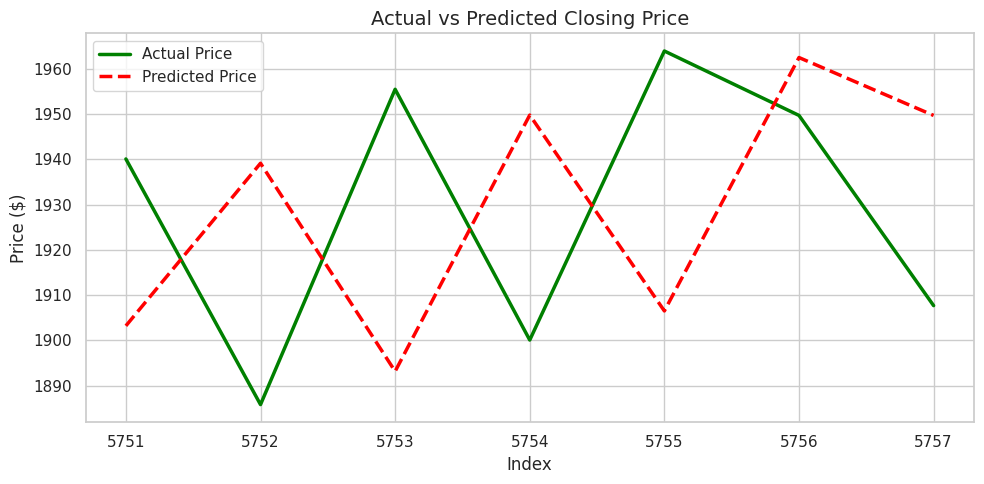

In [23]:
#Actual vs Predicted Price
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test.values, label='Actual Price', linewidth=2.5, color='green')
plt.plot(y_test.index, y_pred, label='Predicted Price', linewidth=2.5, linestyle='--', color='red')
plt.title("Actual vs Predicted Closing Price", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/kaggle/working/outputs/actual_vs_predicted.png", dpi=300)
plt.show()